In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/K2CO3-all.csv')
df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,total_vol,metal_total_conc,K2CO3_total_conc,...,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,FeCl3,destination,XRD,singlephase
0,3.00,0.9,0.15,1.3500,9.00,11.738561,1,9.30,0.100000,0.150000,...,0.952650,1,0.005301,9.928170e-09,-8.003131,4.682620e-07,1,0227-17,"Spinel,ZnO",False
1,0.30,0.9,0.15,1.3500,9.00,11.738561,1,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-19,"Spinel,ZnO",False
2,3.00,1.5,0.15,1.3500,9.00,11.738561,6,9.50,0.160000,0.140000,...,1.222594,1,0.005189,1.490280e-08,-7.826733,7.180060e-07,1,0227-21,"Spinel,?",False
3,0.30,0.9,0.15,1.3500,9.00,11.738561,6,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-23,"Spinel,ZnO",False
4,3.00,1.5,0.45,1.3500,3.00,11.977121,1,3.50,0.430000,0.390000,...,3.324066,1,0.008132,1.541350e-07,-6.812099,4.738780e-06,1,0227-25,"Spinel,Fe2O3",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.17,1.0,0.41,1.5006,3.66,11.956907,6,9.54,0.104822,0.157233,...,0.997544,0,0.003474,2.930080e-09,-8.533121,2.108530e-07,0,0509-#21,NaN,True
66,1.00,0.5,0.15,0.7500,5.00,11.738561,1,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#21,NaN,True
67,1.00,0.5,0.15,0.7500,5.00,11.738561,6,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#22,NaN,False
68,1.00,0.5,0.45,0.7515,1.67,11.977121,1,2.17,0.230000,0.350000,...,2.203650,1,0.007301,5.967200e-08,-7.224229,2.043300e-06,0,0514-#23,NaN,False


In [3]:
df = pd.read_csv('../data/K2CO3-all.csv')

random_indices = np.random.permutation(df.index)
df = df.reindex(random_indices).reset_index(drop=True)


# preprocessing df
# replace the value 'reverse' in the column "precipitation_order" as 1
df['precipitation_order'] = df['precipitation_order'].replace('reverse', 1.0)
# replace the value 'normal' in the column "precipitation_order" as 0 for X
df['precipitation_order'] = df['precipitation_order'].replace('normal', 0.0)

df = df.drop(columns=['XRD', 'destination', 'total_vol'])

# df = df.drop(columns=['temperature', 'precipitation_order', 'K2CO3_conc', 'total volume'])

y_label = 'singlephase'
# preprocessing y
# replace "True" as True, "False" as False, and "no" as None
# single phase is positve, multiphase is negative
df[y_label] = df[y_label].replace('TRUE', True)
df[y_label] = df[y_label].replace('FALSE', False)
df[y_label] = df[y_label].replace('no', None)

# No means xrd can’t be measured due to sample size
# drop rows with None in the column y_label
df = df.dropna(subset=[y_label]).reset_index(drop=True)
# set df[y_label] to boolean
df[y_label] = df[y_label].astype(np.float32)
    
y = df[y_label]

X = df.drop(columns=[y_label, 'FeCl3'])

df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,metal_total_conc,K2CO3_total_conc,ionic_Fe3+,...,ionic_CO32-,ionic_metal,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,FeCl3,singlephase
0,1.682243,0.992523,0.326877,1.500363,4.59,11.907707,6,0.191607,0.289645,0.57482,...,0.579291,0.702558,1.830553,1,0.007165,4.697740e-08,-7.328111,1.639230e-06,1,0.0
1,0.120000,0.900000,0.220000,1.346400,6.12,11.821726,6,0.070000,0.100000,0.21000,...,0.200000,0.256667,0.651522,0,0.003043,1.315140e-09,-8.881027,1.080420e-07,1,0.0
2,1.090000,1.800000,0.360000,2.728800,7.58,11.928666,6,0.200000,0.290000,0.60000,...,0.580000,0.733333,1.873484,0,0.006968,4.511700e-08,-7.345660,1.618630e-06,1,0.0
3,0.300000,0.450000,0.450000,0.675000,1.50,11.977121,1,0.150000,0.226667,0.45000,...,0.453333,0.550000,1.432372,0,0.004743,1.067270e-08,-7.971726,5.625000e-07,1,0.0
4,1.000000,0.500000,0.450000,0.751500,1.67,11.977121,6,0.230000,0.350000,0.69000,...,0.700000,0.843333,2.203650,1,0.007301,5.967200e-08,-7.224229,2.043300e-06,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.040000,1.000000,0.300000,1.500000,5.00,11.889076,6,0.170000,0.250000,0.51000,...,0.500000,0.623333,1.603249,0,0.006498,3.109970e-08,-7.507244,1.196460e-06,1,1.0
66,2.140000,1.500000,0.340000,2.679200,7.88,11.916254,1,0.170000,0.310000,0.51000,...,0.620000,0.623333,1.783787,1,0.007573,4.923090e-08,-7.307762,1.625120e-06,1,0.0
67,0.670000,1.010000,0.200000,1.526000,7.63,11.801030,5,0.110000,0.170000,0.33000,...,0.340000,0.403333,1.062643,0,0.005285,1.082810e-08,-7.965447,5.121640e-07,1,0.0
68,0.300000,0.450000,0.450000,0.675000,1.50,11.977121,1,0.150000,0.226667,0.45000,...,0.453333,0.550000,1.432372,0,0.004743,1.067270e-08,-7.971726,5.625000e-07,0,1.0


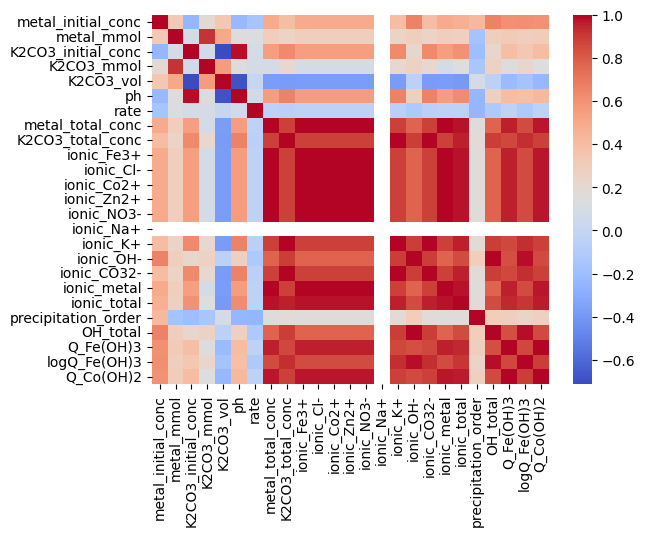

In [4]:
correlation_matrix  = X.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

In [5]:
X = df.drop(columns=[y_label, 'FeCl3', 'ionic_Na+'])

# Compute the correlation matrix
corr_matrix = X.corr().abs()

# Define threshold
threshold = 0.55

# Find columns to drop based on high correlation
columns_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if np.abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            columns_to_drop.add(colname)

# Drop the columns
X = X.drop(columns=columns_to_drop)
X


,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order
0,1.682243,0.992523,0.326877,6,1
1,0.120000,0.900000,0.220000,6,0
2,1.090000,1.800000,0.360000,6,0
3,0.300000,0.450000,0.450000,1,0
4,1.000000,0.500000,0.450000,6,1
...,...,...,...,...,...
65,1.040000,1.000000,0.300000,6,0
66,2.140000,1.500000,0.340000,1,1
67,0.670000,1.010000,0.200000,5,0
68,0.300000,0.450000,0.450000,1,0


<AxesSubplot: >

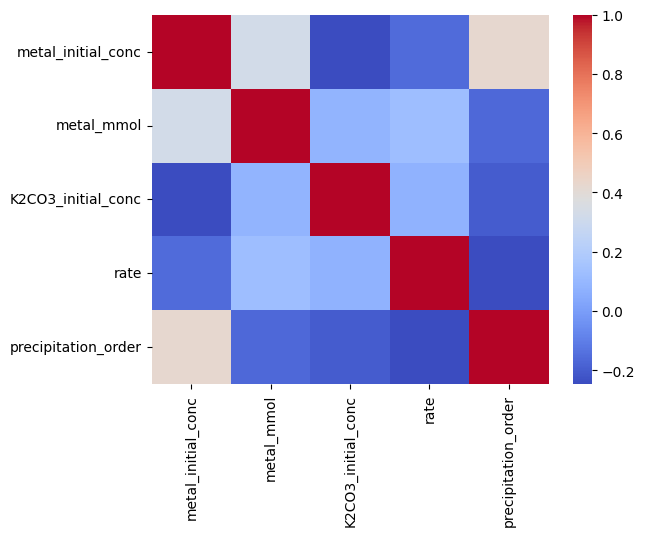

In [6]:
# New coorelation matrix
reduced_correlation_matrix  = X.corr(numeric_only=True)
sns.heatmap(reduced_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

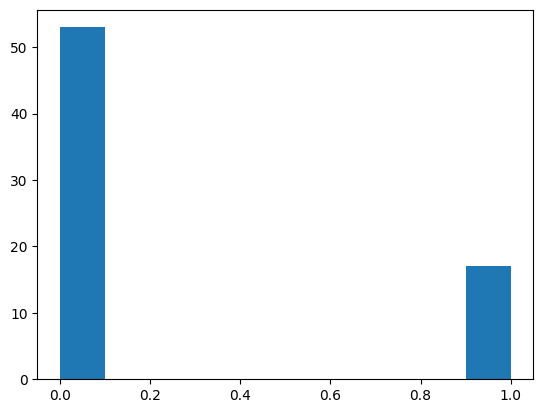

In [7]:
plt.hist(y)

## Using kernel learning

In [8]:
# def kernel_numeric(x1, x2, kernel_type='RBF', gamma=1.0):
#     """
#     Compute kernel between two vectors.
    
#     Parameters:
#     - x1, x2: Input vectors.
#     - kernel_type: Type of the kernel to use ('RBF', 'Manhattan', 'Euclidean').
#     - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).
    
#     Returns:
#     - The kernel value based on the selected kernel type.
#     """
#     if kernel_type == 'Euclidean':
#         return np.sqrt(np.sum((x1 - x2) ** 2))
#     elif kernel_type == 'Manhattan':
#         return np.sum(np.abs(x1 - x2))
#     elif kernel_type == 'RBF':
#         distance_squared = np.sum((x1 - x2) ** 2)
#         return np.exp(-gamma * distance_squared)

def compute_distances(X1, X2, kernel_type='Euclidean', gamma=0.1):
    """
    Compute distances or kernel values between two sets of vectors.

    Parameters:
    - X1, X2: Input datasets. Each should be a NumPy array of shape (n_samples, n_features).
    - kernel_type: Type of the metric or kernel to compute ('RBF', 'Manhattan', 'Euclidean').
    - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).

    Returns:
    - A matrix of distances or kernel values.
    """
    # Calculate the pairwise difference matrix
    diff = X1[:, np.newaxis, :] - X2[np.newaxis, :, :]


    if kernel_type == 'Euclidean':
        # Compute Euclidean distance
        distances = np.sqrt(np.sum(diff**2, axis=2, keepdims=False))
    elif kernel_type == 'Manhattan':
        # Compute Manhattan distance
        distances = np.sum(np.abs(diff), axis=2, keepdims=False)
    elif kernel_type == 'RBF':
        # Compute RBF kernel
        distance_squared = np.sum(diff**2, axis=2, keepdims=False)
        distances = np.exp(-gamma * distance_squared)
    else:
        raise ValueError("Unsupported kernel type")

    return distances


In [9]:
from sklearn.calibration import calibration_curve
plt.rcParams.update({'font.size': 14})
#%% define random forest model for classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
# xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

loo = LeaveOneOut()

# Arrays to store LOOCV results
predictions = np.zeros(len(y))       # 0/1 classification predictions
distances   = np.zeros(len(y))       # We'll store the absolute distance from boundary
pred_prob = np.zeros(len(y))

kernel_classifier = SVC(kernel='rbf', probability=True, random_state=42,class_weight='balanced')

# Perform LOOCV
for train_index, test_index in tqdm(loo.split(X), total=loo.get_n_splits(X), desc="Processing LeaveOneOut"):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale features
    scaler = MinMaxScaler()
    X_train_S = scaler.fit_transform(X_train)
    X_test_S  = scaler.transform(X_test)

    # Compute distances for the kernel transformation
    kernel_type = 'Euclidean'
    X_train_sfs = compute_distances(X_train_S, X_train_S, kernel_type=kernel_type)
    X_test_sfs  = compute_distances(X_test_S,  X_train_S, kernel_type=kernel_type)

    # Train classifier on the "train" fold
    clf = kernel_classifier
    clf.fit(X_train_sfs, y_train)

    # Predict on the left-out sample
    decision_function = clf.decision_function(X_test_sfs)  # shape = (1,) in LOOCV
    y_pred = clf.predict(X_test_sfs)                      # shape = (1,)
    pred_prob[test_index] = clf.predict_proba(X_test_sfs)[:,1]

    # Store 0/1 prediction
    predictions[test_index] = y_pred
    # Store absolute distance from boundary (for eventual "confidence")
    distances[test_index] = np.abs(decision_function[0])

# -------------------------
# Convert distances to "confidence" and then to "uncertainty"
# -------------------------
# 'distances' can be viewed as "raw confidence" (larger => more confident).
# We'll normalize it to [0, 1], then invert to get "uncertainty" if needed.

# 1) Normalize distances to [0, 1]
distances_norm = distances / np.max(distances)  # now in [0, 1]

# 2) "Uncertainty" in [0, 1] => 1 means *very uncertain*, 0 means *very certain*
uncertainties = 1 - distances_norm

# Or "confidence" in [0, 1] => 1 means *very certain*, 0 means *very uncertain*
confidence = 1 - uncertainties  # which is just distances_norm

# At this point:
#   predictions: 0/1
#   uncertainties: measure in [0,1] (1 => uncertain)
#   confidence: measure in [0,1]   (1 => very confident)

print("Predictions (LOOCV) =", predictions)
print("Uncertainties (LOOCV) =", uncertainties)
print("Confidence (LOOCV) =", confidence)

# # -----------------------------------
# # Create a Calibration Curve (Reliability Diagram)
# # -----------------------------------
# # Ideally, you'd use predict_proba for a true probability, but let's
# # treat 'confidence' as if it were a probability for visualization.
# y_true = y.values  # ground truth labels as a NumPy array
# y_conf = confidence
# p70 = np.percentile(uncertainties, 15)
# bins = [0, p70, 1]

# missing_region_df = pd.read_csv("../data/K2CO3-1106-missing-region-experiments.csv").dropna()
# X_test_missing = missing_region_df[["metal_initial_conc", 
#                   "metal_mmol", 
#                   "K2CO3_initial_conc", 
#                   "rate", 
#                   "precipitation_order"]]
# y_test_missing = missing_region_df["singlephase"].values.astype(float)

# X_test_S_missing = scaler.transform(X_test_missing)
# X_test_sfs_missing = compute_distances(X_test_S_missing, X_train_S, kernel_type=kernel_type)

# decision_function = clf.decision_function(X_test_sfs_missing)
# preds_missing = clf.predict_proba(X_test_sfs_missing)[:,1]
# uncerts_missing = np.abs(decision_function)
# uncerts_missing = 1 - uncerts_missing / np.max(uncerts_missing)

# missing_region_df["predicted_singlephase"] = preds
# missing_region_df["uncertainty"] = uncerts


# y = missing_region_df["singlephase"].values.astype(float)
# yhat = missing_region_df["predicted_singlephase"].values
# np.concat([pred_prob, yhat])

# np.concatenate([y, y_test_missing])
# np.concatenate([pred_prob, preds_missing])



Processing LeaveOneOut: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 269.27it/s]

Predictions (LOOCV) = [0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
Uncertainties (LOOCV) = [0.25829361 0.85997565 0.62033285 0.35488884 0.605977   0.65918104
 0.67032111 0.35478413 0.5188367  0.61543786 0.39016781 0.36402235
 0.48685902 0.35048253 0.82543799 0.82730937 0.67218429 0.35499912
 0.35483841 0.51324384 0.42690066 0.35493409 0.65918104 0.5283504
 0.35499912 0.17009176 0.17394798 0.45880115 0.52973599 0.95223432
 0.35499912 0.25622286 0.58189275 0.61543786 0.39906699 0.41517856
 0.95223432 0.97733735 0.1165537  0.2081946  0.32261927 0.35493409
 0.30019858 0.33907944 0.65544075 0.35480305 0.35918708 0.
 0.2996309  0.34107744 0.29869293 0.32273904 0.44975738 0.3687937
 0.35493409 0.33907944 0.605977   0.19648002 0.82730937 0.34587895
 0.33907944 0.7139089  0.91011053 0.12573277 0.72410714 0.91413621
 0.21673429 0

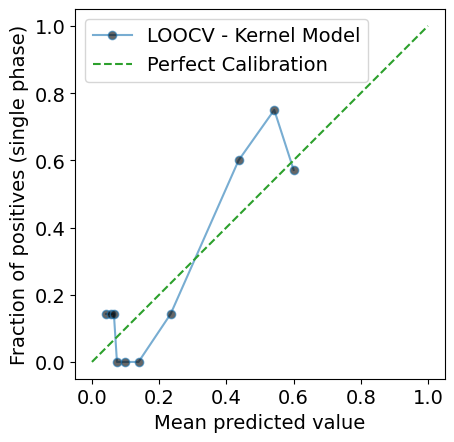

In [10]:
prob_true, prob_pred = calibration_curve(y, pred_prob, n_bins=10, strategy='quantile')

plt.plot(prob_pred, prob_true, marker='o', label="LOOCV - Kernel Model", alpha=0.6, markerfacecolor='k')
plt.plot([0,1],[0,1], '--', label="Perfect Calibration", color='C2')
plt.xlabel("Mean predicted value")  # x-axis
plt.ylabel("Fraction of positives (single phase)")       # y-axis
# plt.title("Calibration Curve (LOOCV)")
ax=plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

(array([31., 10.,  4.,  4.,  2.,  2.,  6.,  8.,  1.,  2.]),
 array([0.03181168, 0.09874692, 0.16568216, 0.23261741, 0.29955265,
        0.36648789, 0.43342314, 0.50035838, 0.56729362, 0.63422887,
        0.70116411]),
 <BarContainer object of 10 artists>)

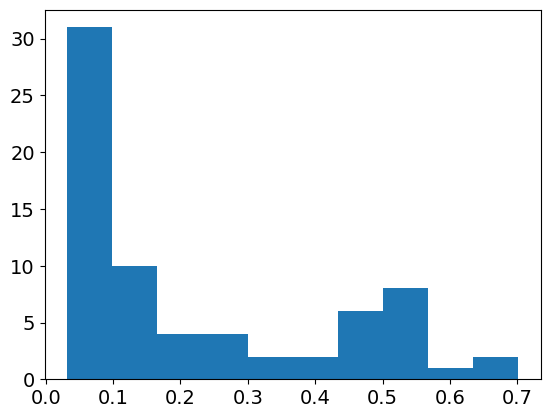

In [11]:
plt.hist(pred_prob)

In [12]:
compute_distances(X_train_S, X_train_S,  kernel_type=kernel_type)

array([[0.        , 1.18226714, 1.18724022, ..., 1.08076831, 1.14147013,
        1.5883901 ],
       [1.18226714, 0.        , 0.85289659, ..., 1.67751146, 0.29422751,
        1.25404538],
       [1.18724022, 0.85289659, 0.        , ..., 1.47843293, 0.79067209,
        1.46468862],
       ...,
       [1.08076831, 1.67751146, 1.47843293, ..., 0.        , 1.48385224,
        1.45526237],
       [1.14147013, 0.29422751, 0.79067209, ..., 1.48385224, 0.        ,
        1.17014268],
       [1.5883901 , 1.25404538, 1.46468862, ..., 1.45526237, 1.17014268,
        0.        ]])

LOOCV estimate accuracy: 0.843
LOOCV estimate balanced accuracy: 0.836
LOOCV estimate recall: 0.824
LOOCV estimate precision: 0.636
LOOCV estimate AUC: 0.836


Text(0.5, 1.0, 'ACC: 0.843, AUC: 0.836\n')

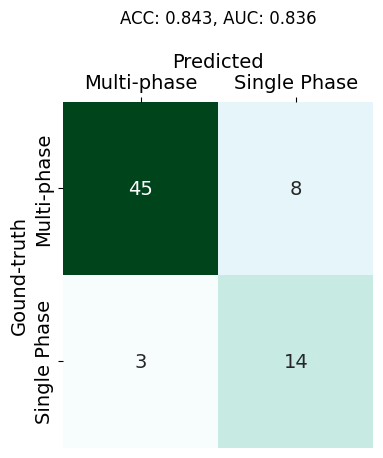

In [13]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, recall_score, precision_score



# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print(f'LOOCV estimate accuracy: {accuracy:.3f}')

# calculation balanced accuracy
balanced_accuracy = balanced_accuracy_score(y, predictions)
print(f'LOOCV estimate balanced accuracy: {balanced_accuracy:.3f}')


recall = recall_score(y, predictions)
print(f'LOOCV estimate recall: {recall:.3f}')

precision = precision_score(y, predictions)
print(f'LOOCV estimate precision: {precision:.3f}')

# Calculate AUC
auc = roc_auc_score(y, predictions)
print(f'LOOCV estimate AUC: {auc:.3f}')

#%% confusion matrix
from sklearn.metrics import confusion_matrix
confuse_matrix = confusion_matrix(y, predictions)

# Convert to DataFrame and replace 0 and 1
confuse_matrix_df = pd.DataFrame(confuse_matrix, 
                                 columns=['Multi-phase', 'Single Phase'], 
                                 index=['Multi-phase', 'Single Phase'])



# plot confuse matrix

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confuse_matrix_df, annot=True, cbar=False, cmap='BuGn')
plt.xlabel('Predicted')
plt.ylabel('Gound-truth')
# show x label and x ticks on the top
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
# set fig size
plt.gcf().set_size_inches(4, 4.5)

# add metrics to the title
plt.title(f'ACC: {accuracy:.3f}, AUC: {auc:.3f}\n',fontsize=12)
# plt.savefig('confusion_matrix.png', dpi=400,  bbox_inches='tight')



## Missing Region Experiments

In [14]:
missing_region_df = pd.read_csv("../data/K2CO3-1106-missing-region-experiments.csv").dropna()
missing_region_df

,sample,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order,singlephase
0,1106-#1,0.4,0.3,0.16,2,0,False
1,1106-#2,0.4,0.8,0.16,4,0,False
2,1106-#3,1.2,0.3,0.16,2,0,False
3,1106-#4,1.2,0.8,0.16,4,0,False
4,1106-#5,0.4,0.3,0.20,2,0,False
5,1106-#6,0.4,0.8,0.20,4,0,False
6,1106-#7,1.2,0.3,0.20,2,0,False
7,1106-#8,1.2,0.8,0.20,4,0,False
8,1106-#9,0.4,0.3,0.24,2,0,False
9,1106-#10,0.4,0.8,0.24,4,0,False


In [15]:
X_test = missing_region_df[["metal_initial_conc", 
                  "metal_mmol", 
                  "K2CO3_initial_conc", 
                  "rate", 
                  "precipitation_order"]]

X_test_S = scaler.transform(X_test)
X_test_sfs = compute_distances(X_test_S, X_train_S, kernel_type=kernel_type)

decision_function = clf.decision_function(X_test_sfs)
preds = clf.predict(X_test_sfs)
preds_prob = clf.predict_proba(X_test_sfs)[:,1]
uncerts = np.abs(decision_function)
uncerts = 1 - uncerts / np.max(uncerts)

missing_region_df["predicted_singlephase"] = preds
missing_region_df["uncertainty"] = uncerts
missing_region_df["probability"] = preds_prob
missing_region_df

,sample,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order,singlephase,predicted_singlephase,uncertainty,probability
0,1106-#1,0.4,0.3,0.16,2,0,False,0.0,0.921287,0.236179
1,1106-#2,0.4,0.8,0.16,4,0,False,0.0,0.076846,0.058609
2,1106-#3,1.2,0.3,0.16,2,0,False,0.0,0.800332,0.196274
3,1106-#4,1.2,0.8,0.16,4,0,False,0.0,0.000000,0.050640
4,1106-#5,0.4,0.3,0.20,2,0,False,0.0,0.903890,0.230110
5,1106-#6,0.4,0.8,0.20,4,0,False,0.0,0.199776,0.070338
6,1106-#7,1.2,0.3,0.20,2,0,False,0.0,0.761821,0.184691
7,1106-#8,1.2,0.8,0.20,4,0,False,0.0,0.118188,0.060614
8,1106-#9,0.4,0.3,0.24,2,0,False,0.0,0.921486,0.236249
9,1106-#10,0.4,0.8,0.24,4,0,False,0.0,0.380751,0.097228


In [16]:
y = missing_region_df["singlephase"].values.astype(float)
yhat = missing_region_df["predicted_singlephase"].values
missing_region_accuracy = accuracy_score(y, yhat)
missing_region_accuracy

0.6451612903225806

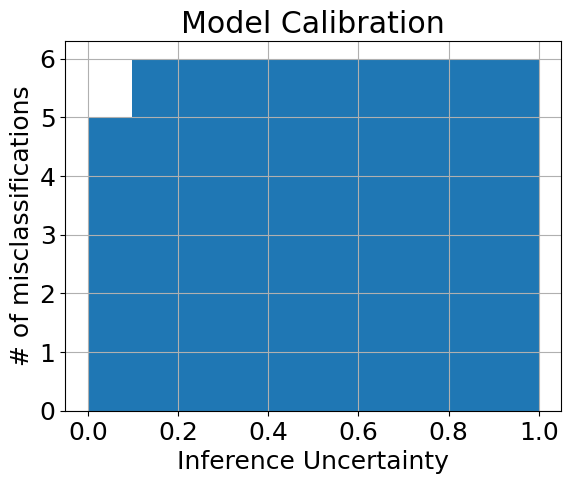

In [18]:
disagreements = (yhat != y)

missing_region_df["disagreement"] = disagreements
df_disagreements = missing_region_df[missing_region_df["disagreement"]]
df_disagreements
p70 = np.percentile(preds_prob, 40)  # 70th percentile
bins = [0, p70, 1]

# df_disagreements["uncertainty"].hist(bins=bins)
df_disagreements["probability"].hist(bins=bins)
plt.xlabel("Inference Uncertainty")
plt.ylabel("# of misclassifications")
plt.title("Model Calibration")
plt.rcParams.update({'font.size': 18})
# plt.show()

In [19]:
df_disagreements

,sample,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order,singlephase,predicted_singlephase,uncertainty,probability,disagreement
16,1106-#17,0.4,0.3,0.16,2,1,False,1.0,0.469763,0.500000,True
18,1106-#19,1.2,0.3,0.16,2,1,False,1.0,0.521859,0.478205,True
19,1106-#20,1.2,0.8,0.16,4,1,True,0.0,0.369328,0.095290,True
20,1106-#21,0.4,0.3,0.20,2,1,False,1.0,0.621826,0.430051,True
21,1106-#22,0.4,0.8,0.20,4,1,True,0.0,0.281763,0.081544,True
22,1106-#23,1.2,0.3,0.20,2,1,False,1.0,0.693864,0.396512,True
23,1106-#24,1.2,0.8,0.20,4,1,True,0.0,0.262796,0.078815,True
24,1106-#25,0.4,0.3,0.24,2,1,False,1.0,0.799833,0.350012,True
27,1106-#28,1.2,0.8,0.24,4,1,True,0.0,0.182612,0.068179,True
28,1106-#29,0.4,0.3,0.28,2,1,False,1.0,0.967001,0.277724,True


## Model calibration

/tmp/ipykernel_242215/3298309461.py:160: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


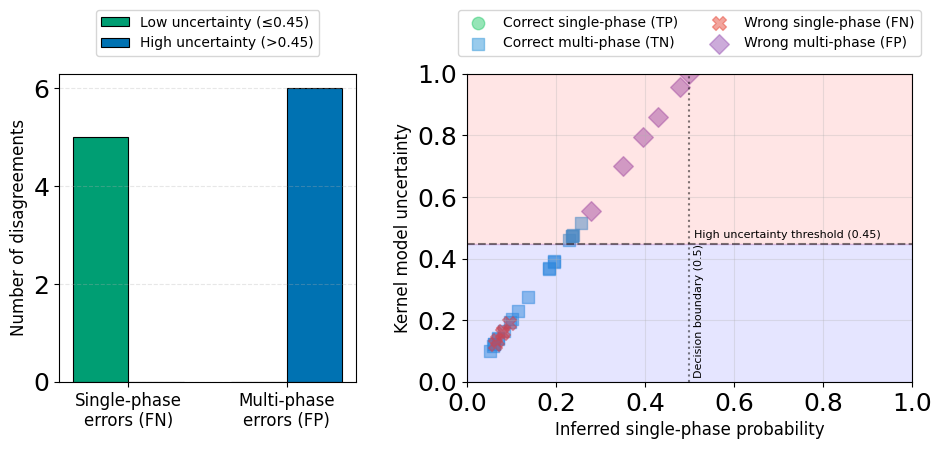

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib


# Calculate probability-based uncertainty
X_test = missing_region_df[["metal_initial_conc", 
                  "metal_mmol", 
                  "K2CO3_initial_conc", 
                  "rate", 
                  "precipitation_order"]]
X_test_S = scaler.transform(X_test)
X_test_sfs = compute_distances(X_test_S, X_train_S, kernel_type=kernel_type)
preds = clf.predict(X_test_sfs)
preds_prob = clf.predict_proba(X_test_sfs)[:,1]  # Probability of positive class (single-phase)

# Create dataframe with results
results_df = missing_region_df.copy()
results_df["predicted_singlephase"] = preds
results_df["probability"] = preds_prob
y_true = results_df["singlephase"].values.astype(float)
results_df["disagreement"] = (preds != y_true)

# Calculate uncertainty as distance from 0.5 probability
certainty_scores = np.abs(preds_prob - 0.5)
prob_uncertainty = 0.5 - certainty_scores  # Range: 0 to 0.5
prob_uncertainty_norm = prob_uncertainty / 0.5  # Normalized to [0,1]
results_df["uncertainty"] = prob_uncertainty_norm

# Calculate high uncertainty threshold (66th percentile)
high_uncertainty_threshold = np.percentile(results_df["uncertainty"], 66)

# Create groups for analysis
# Single-phase (positive) disagreements
pos_wrong_low_uncert = results_df[(results_df["disagreement"]) & 
                                  (results_df["singlephase"] == 1) &
                                  (results_df["uncertainty"] <= high_uncertainty_threshold)]
pos_wrong_high_uncert = results_df[(results_df["disagreement"]) & 
                                   (results_df["singlephase"] == 1) &
                                   (results_df["uncertainty"] > high_uncertainty_threshold)]

# Multi-phase (negative) disagreements
neg_wrong_low_uncert = results_df[(results_df["disagreement"]) & 
                                  (results_df["singlephase"] == 0) &
                                  (results_df["uncertainty"] <= high_uncertainty_threshold)]
neg_wrong_high_uncert = results_df[(results_df["disagreement"]) & 
                                   (results_df["singlephase"] == 0) &
                                   (results_df["uncertainty"] > high_uncertainty_threshold)]

# Count entries in each group
n_pos_wrong_low = len(pos_wrong_low_uncert)
n_pos_wrong_high = len(pos_wrong_high_uncert)
n_neg_wrong_low = len(neg_wrong_low_uncert)
n_neg_wrong_high = len(neg_wrong_high_uncert)

# Calculate total wrong per class
pos_wrong_total = n_pos_wrong_low + n_pos_wrong_high
neg_wrong_total = n_neg_wrong_low + n_neg_wrong_high
total_wrong = pos_wrong_total + neg_wrong_total

# Calculate percentages
pos_high_pct = (n_pos_wrong_high / pos_wrong_total * 100) if pos_wrong_total > 0 else 0
neg_high_pct = (n_neg_wrong_high / neg_wrong_total * 100) if neg_wrong_total > 0 else 0
total_high_pct = ((n_pos_wrong_high + n_neg_wrong_high) / total_wrong * 100) if total_wrong > 0 else 0

# Create figure with two subplots
fig = plt.figure(figsize=(11, 4))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5], wspace=0.3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plot 1: Bar chart showing error distribution by uncertainty level
x = np.arange(2)
width = 0.35

# Calculate bar heights
low_counts = [n_pos_wrong_low, n_neg_wrong_low]
high_counts = [n_pos_wrong_high, n_neg_wrong_high]

# Create bars with custom colors
low_bars = ax1.bar(x - width/2, low_counts, width, 
                  label=f'Low uncertainty (≤{high_uncertainty_threshold:.2f})', 
                  color='#009e73', edgecolor='black', linewidth=0.8)
high_bars = ax1.bar(x + width/2, high_counts, width, 
                   label=f'High uncertainty (>{high_uncertainty_threshold:.2f})', 
                   color='#0072b2', edgecolor='black', linewidth=0.8)

# # Add data labels on top of bars
# def add_labels(bars):
#     for bar in bars:
#         height = bar.get_height()
#         if height > 0:  # Only add labels to non-zero bars
#             ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
#                     f'{int(height)}', ha='center', va='bottom', fontsize=11)

# add_labels(low_bars)
# add_labels(high_bars)

# # Add percentage texts for high uncertainty
# if pos_wrong_total > 0:
#     y_pos = high_counts[0] + 0.5 if high_counts[0] > 0 else 0.5
#     ax1.text(x[0] + width/2, y_pos, f'{pos_high_pct:.1f}%', 
#             ha='center', va='bottom', fontsize=10, color='#e74c3c')
# if neg_wrong_total > 0:
#     ax1.text(x[1] + width/2, high_counts[1] + 0.5, f'{neg_high_pct:.1f}%', 
#             ha='center', va='bottom', fontsize=10, color='#e74c3c')

# Add labels, title and axis ticks
ax1.set_ylabel('Number of disagreements', fontsize=12)
# ax1.set_title('A) Distribution of Model Errors', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(['Single-phase\nerrors (FN)', 'Multi-phase\nerrors (FP)'], fontsize=12)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.23), ncol=1,  fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.3)



# Plot 2: Scatter plot of all points showing uncertainty vs probability
correct_points = results_df[~results_df["disagreement"]]
wrong_points = results_df[results_df["disagreement"]]

# Plot points with prediction probability on x-axis and uncertainty on y-axis
ax2.scatter(correct_points[correct_points["singlephase"]==1]["probability"], 
           correct_points[correct_points["singlephase"]==1]["uncertainty"], 
           c='#2ecc71', marker='o', s=80, alpha=0.5, label='Correct single-phase (TP)')
ax2.scatter(correct_points[correct_points["singlephase"]==0]["probability"], 
           correct_points[correct_points["singlephase"]==0]["uncertainty"], 
           c='#3498db', marker='s', s=80, alpha=0.5, label='Correct multi-phase (TN)')
ax2.scatter(wrong_points[wrong_points["singlephase"]==1]["probability"], 
           wrong_points[wrong_points["singlephase"]==1]["uncertainty"], 
           c='#e74c3c', marker='X', s=100, alpha=0.5, label='Wrong single-phase (FN)')
ax2.scatter(wrong_points[wrong_points["singlephase"]==0]["probability"], 
           wrong_points[wrong_points["singlephase"]==0]["uncertainty"], 
           c='#9b59b6', marker='D', s=100, alpha=0.5, label='Wrong multi-phase (FP)')

# Add horizontal line at high uncertainty threshold
ax2.axhline(y=high_uncertainty_threshold, color='k', linestyle='--', alpha=0.5)
ax2.text(0.51, high_uncertainty_threshold + 0.02, f'High uncertainty threshold ({high_uncertainty_threshold:.2f})', 
        fontsize=8)

# Add vertical line at probability = 0.5 (decision boundary)
ax2.axvline(x=0.5, color='k', linestyle=':', alpha=0.5)
ax2.text(0.51, 0.02, 'Decision boundary (0.5)', fontsize=8, rotation=90)

# Highlight high uncertainty region
ax2.axhspan(high_uncertainty_threshold, 1.0, alpha=0.1, color='red')
ax2.axhspan(0, high_uncertainty_threshold, alpha=0.1, color='blue')

# Labels and formatting
ax2.set_xlabel('Inferred single-phase probability', fontsize=12, )
ax2.set_ylabel('Kernel model uncertainty', fontsize=12)
# ax2.set_title('B) Prediction Confidence vs. Uncertainty', fontsize=14)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.23), ncol=2,  fontsize=10)

plt.tight_layout()
plt.savefig('model_calibration.png', dpi=600, bbox_inches='tight')
# plt.savefig('uncertainty_analysis.pdf', bbox_inches='tight')
# plt.show()